<a href="https://colab.research.google.com/github/stervigene/miRNA_networks/blob/main/tissu_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes suivi de modifications 

25/10/22- TS
> Requete faite + API + graph (pour un exemple seulement) et requete des gènes + nombre topexpressed voulu
il ne manque plus q'un nettoyage des data en fonction des gènes ubiquitaire (choisir A/B dans le code) si on veut les gènes exprimés seulement dans ce tissus 

In [32]:
import requests as rq 
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt


In [33]:
options = ['Adipose_Subcutaneous', 'Adipose_Visceral_Omentum', 'Adrenal_Gland', 'Artery_Aorta', 'Artery_Coronary', 'Artery_Tibial','Bladder', 
           'Brain_Amygdala' ,'Brain_Anterior_cingulate_cortex_BA24', 'Brain_Caudate_basal_ganglia', 'Brain_Cerebellar_Hemisphere', 'Brain_Cerebellum',
           'Brain_Cortex' ,'Brain_Frontal_Cortex_BA9', 'Brain_Hippocampus', 'Brain_Hypothalamus', 'Brain_Nucleus_accumbens_basal_ganglia', 'Brain_Putamen_basal_ganglia',
           'Brain_Spinal_cord_cervical_c-1' ,'Brain_Substantia_nigra', 'Breast_Mammary_Tissue' ,'Cells_Cultured_fibroblasts' ,'Cells_EBV-transformed_lymphocytes', 'Cells_Transformed_fibroblasts' ,'Cervix_Ectocervix',
           'Cervix_Endocervix', 'Colon_Sigmoid' ,'Colon_Transverse', 'Esophagus_Gastroesophageal_Junction', 'Esophagus_Mucosa', 'Esophagus_Muscularis', 'Fallopian_Tube', 'Heart_Atrial_Appendage', 'Heart_Left_Ventricle',
           'Kidney_Cortex', 'Liver' 'Lung', 'Minor_Salivary_Gland', 'Muscle_Skeletal', 'Nerve_Tibial', 'Ovary', 'Pancreas', 'Pituitary', 'Prostate', 'Skin_Not_Sun_Exposed_Suprapubic', 'Skin_Sun_Exposed_Lower_leg',
           'Small_Intestine_Terminal_Ileum', 'Spleen', 'Stomach', 'Testis', 'Thyroid', 'Uterus', 'Vagina', 'Whole_Blood']

tissue = ''

input_message = "Pick an option:\n"

for index, item in enumerate(options):
    input_message += f'{index+1}) {item}\n'

input_message += 'Your choice: '

while tissue not in options:
  tissue = input(input_message)

print('You picked: ' + tissue)

Pick an option:
1) Adipose_Subcutaneous
2) Adipose_Visceral_Omentum
3) Adrenal_Gland
4) Artery_Aorta
5) Artery_Coronary
6) Artery_Tibial
7) Bladder
8) Brain_Amygdala
9) Brain_Anterior_cingulate_cortex_BA24
10) Brain_Caudate_basal_ganglia
11) Brain_Cerebellar_Hemisphere
12) Brain_Cerebellum
13) Brain_Cortex
14) Brain_Frontal_Cortex_BA9
15) Brain_Hippocampus
16) Brain_Hypothalamus
17) Brain_Nucleus_accumbens_basal_ganglia
18) Brain_Putamen_basal_ganglia
19) Brain_Spinal_cord_cervical_c-1
20) Brain_Substantia_nigra
21) Breast_Mammary_Tissue
22) Cells_Cultured_fibroblasts
23) Cells_EBV-transformed_lymphocytes
24) Cells_Transformed_fibroblasts
25) Cervix_Ectocervix
26) Cervix_Endocervix
27) Colon_Sigmoid
28) Colon_Transverse
29) Esophagus_Gastroesophageal_Junction
30) Esophagus_Mucosa
31) Esophagus_Muscularis
32) Fallopian_Tube
33) Heart_Atrial_Appendage
34) Heart_Left_Ventricle
35) Kidney_Cortex
36) LiverLung
37) Minor_Salivary_Gland
38) Muscle_Skeletal
39) Nerve_Tibial
40) Ovary
41) Pancr

In [34]:
nb_gene = ''
input_message = "Number of gene you want to output :\n"
nb_gene = input(input_message)


Number of gene you want to output :
100


In [35]:
#j'ai mis ce code dans le cas ou on filtrerai le résultat avec les gènes ubiquitaires pour ressortir seulement les gènes tissus spécifiques (j'ai pas) encore trouvé de databases
options = ['Y','N'] 
filt_gene = ''
input_message = "including muitochondrial genes ? (Y/N)"
while filt_gene not in options:
  filt_gene = input(input_message)
print('You picked: Choice '  + filt_gene)

if filt_gene == 'Y':
  option = 'false'
else :
  option = 'true'


including muitochondrial genes ? (Y/N)N
You picked: Choice N


In [36]:
url = "https://gtexportal.org/rest/v1/expression/topExpressedGene?datasetId=gtex_v8&tissueSiteDetailId="+ tissue +"&filterMtGene="+option+"true&sortBy=median&sortDirection=desc&pageSize="+ nb_gene + "&format=json"
res = rq.get(url)
data = res.json()
data["topExpressedGene"][0].keys()

dict_keys(['datasetId', 'gencodeId', 'geneSymbol', 'median', 'tissueSiteDetailId', 'unit'])

In [37]:
len(data["topExpressedGene"])

100

In [ ]:
for i in data["topExpressedGene"] :
  print(i['geneSymbol'], i['gencodeId'],'TPM', '=',i['median'] )

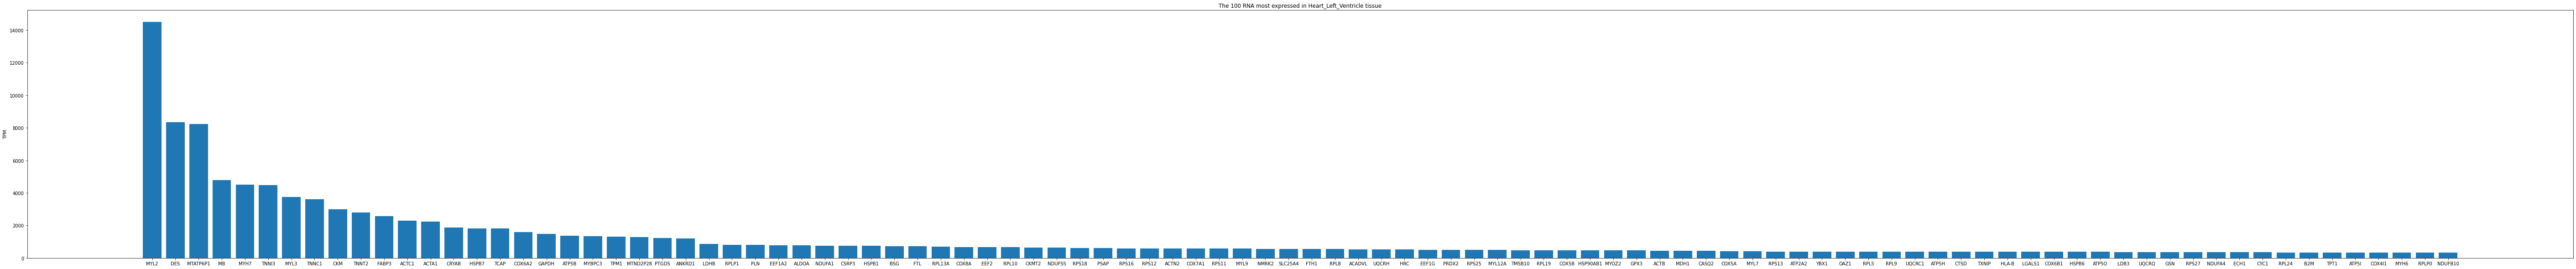

In [38]:
geneSymbol = []
median = []
for i in data["topExpressedGene"] :
    geneSymbol.append(i['geneSymbol'])
    median.append(i['median'])
y_pos = np.arange(len(geneSymbol))
fig, ax = plt.subplots(figsize=(len(data["topExpressedGene"]),10))
plt.bar(y_pos, median)
plt.ylabel('TPM')
plt.title(('The '+nb_gene+' RNA most expressed in '+ tissue +' tissue'))
plt.xticks(y_pos, geneSymbol)
plt.savefig('graph.png')

# test pour seuil max (!! ne pas utiliser : trop long pour le moment)

In [ ]:
geneSymbol = []
median = []
#Initialiser un seuil max ou M: 
treshold = 500 #(exemple)
for i in data["topExpressedGene"] :
  if i['median'] > 0 and i['median'] < treshold : 
    geneSymbol.append(i['geneSymbol'])
    median.append(i['median'])
y_pos = np.arange(len(geneSymbol))
fig, ax = plt.subplots(figsize=(30,10))
plt.bar(y_pos, median)
plt.ylabel('TPM')
plt.title(('The '+nb_gene+' RNA most expressed in '+ tissue +' tissue'))
plt.xticks(y_pos, geneSymbol)
plt.savefig('graph.png')